In [ ]:
import numpy as np 
import pandas as pd 
import os
from PIL import Image
import warnings

In [ ]:

with warnings.catch_warnings():
    warnings.simplefilter("ignore", Image.DecompressionBombWarning)

fake_dir = '/kaggle/input/ai-generated-images-vs-real-images/train/fake'
real_dir = '/kaggle/input/ai-generated-images-vs-real-images/train/real'


file_extensions = {'fake': [], 'real': []}
image_shapes = {'fake': [], 'real': [] }
image_sizes = {'fake': [], 'real': []}

def explore_images(directory, label):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                ext = filename.split('.')[-1].lower()
                file_extensions[label].append(ext)

                shape = img.size  
                image_shapes[label].append(shape)

                size = os.path.getsize(file_path)
                image_sizes[label].append(size)
        except Exception as e:
            print(f"Could not process file {file_path}: {e}")

explore_images(fake_dir, 'fake')

explore_images(real_dir, 'real')


print(f"fake Image Extensions: {set(file_extensions['fake'])}")
print(f"real Image Extensions: {set(file_extensions['real'])}")

print(f"fake Image Shapes: {set(image_shapes['fake'])}")
print(f"real Image Shapes: {set(image_shapes['real'])}")


print(f"fake Image Sizes (min, max): {min(image_sizes['fake'])} bytes, {max(image_sizes['fake'])} bytes")
print(f"real Image Sizes (min, max): {min(image_sizes['real'])} bytes, {max(image_sizes['real'])} bytes")

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (99991727 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (161087488 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (96000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (90671520 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/PIL/Image.py:3368: DecompressionBombWarning: Image size (107184040 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DO

fake Image Extensions: {'png', 'jpg'}
real Image Extensions: {'jpg'}
fake Image Shapes: {(2251, 2813), (798, 803), (1200, 1600), (1072, 1680), (1908, 2181), (1338, 896), (1524, 1172), (2880, 5760), (1080, 1540), (1626, 810), (365, 511), (576, 960), (900, 1200), (2000, 993), (2912, 1632), (1536, 1532), (2079, 993), (832, 512), (1264, 960), (982, 982), (1828, 773), (4142, 1916), (1296, 912), (672, 1808), (2072, 2939), (863, 1030), (1024, 718), (4000, 3000), (4335, 2990), (864, 1376), (1015, 1020), (896, 1328), (1334, 2048), (1154, 1443), (1024, 1104), (1280, 1704), (1664, 2304), (3072, 4608), (1536, 2304), (874, 607), (5376, 1536), (1061, 470), (2528, 1920), (1480, 1850), (1648, 760), (896, 896), (1104, 696), (889, 893), (1024, 672), (1232, 1232), (3296, 1440), (1880, 2350), (2912, 1514), (412, 675), (1170, 1665), (3904, 1216), (2500, 1426), (688, 1024), (933, 1200), (3840, 3037), (1456, 832), (1328, 912), (960, 1568), (1360, 864), (1481, 1190), (1920, 2400), (1920, 1088), (1640, 2122), 

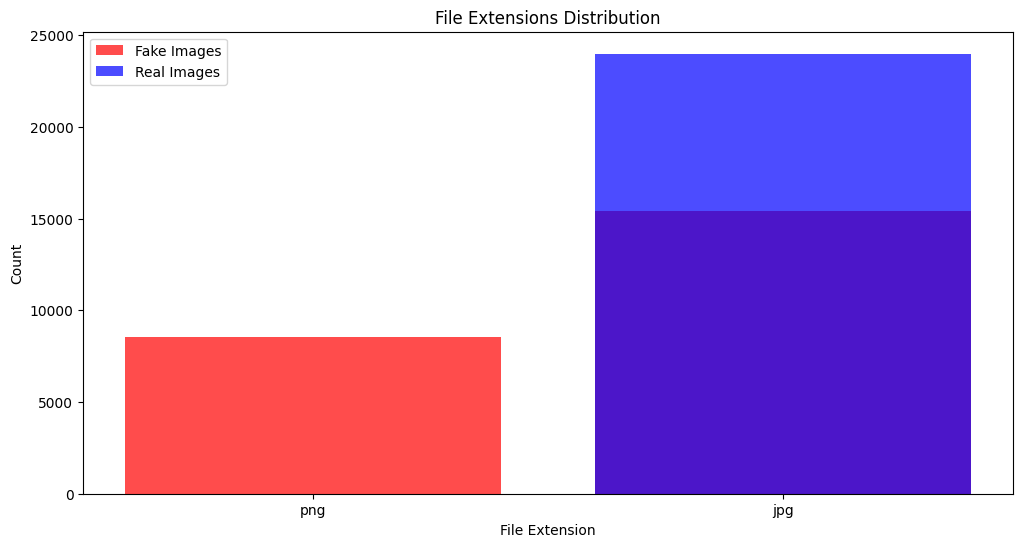

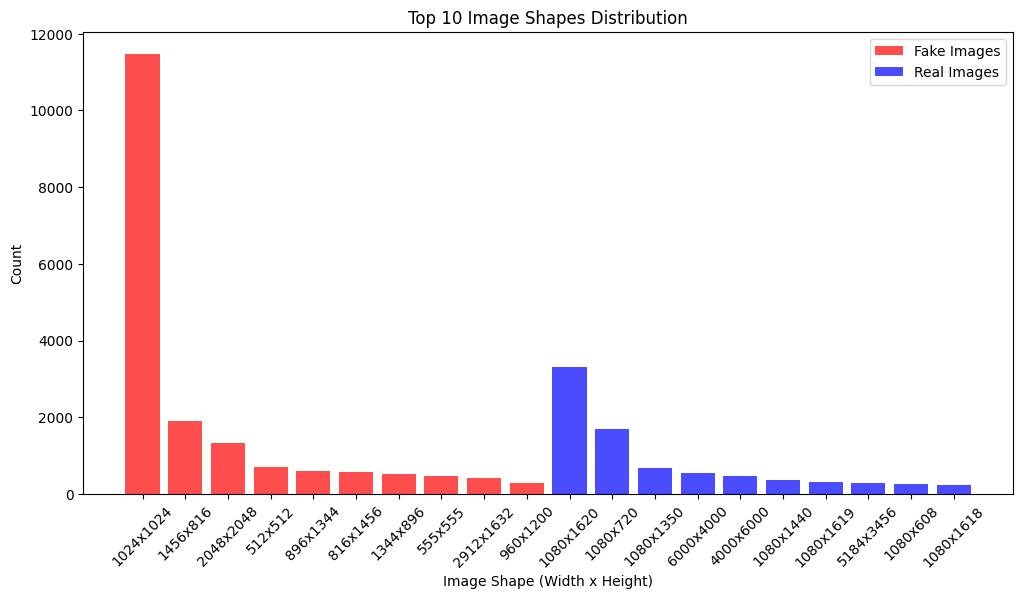

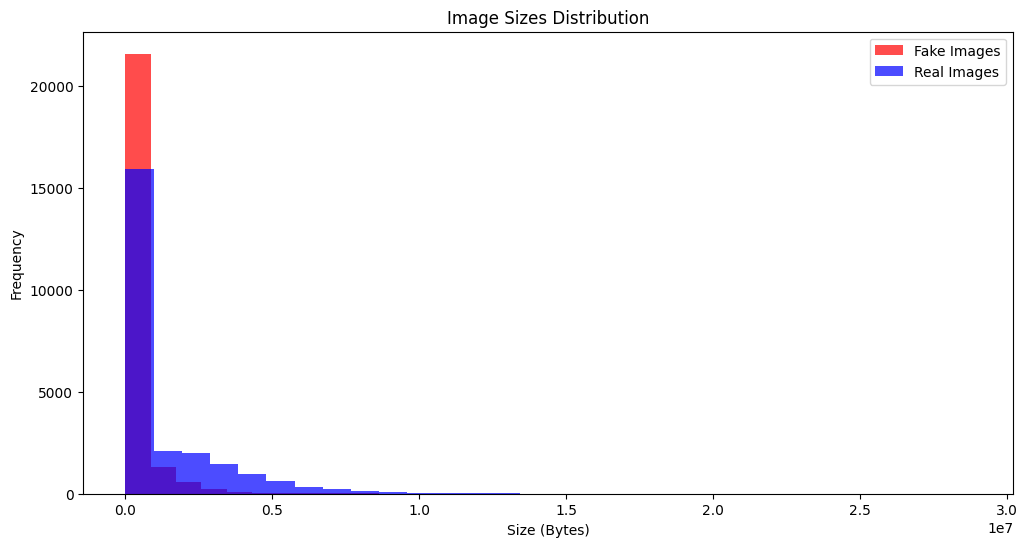

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_file_extensions():
    fake_counts = Counter(file_extensions['fake'])
    real_counts = Counter(file_extensions['real'])

    plt.figure(figsize=(12, 6))

    plt.bar(fake_counts.keys(), fake_counts.values(), color='red', alpha=0.7, label='Fake Images')
    plt.bar(real_counts.keys(), real_counts.values(), color='blue', alpha=0.7, label='Real Images')

    plt.title('File Extensions Distribution')
    plt.xlabel('File Extension')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

def plot_image_shapes():
    fake_shapes = Counter(image_shapes['fake'])
    real_shapes = Counter(image_shapes['real'])

    fake_shapes = dict(sorted(fake_shapes.items(), key=lambda x: x[1], reverse=True))
    real_shapes = dict(sorted(real_shapes.items(), key=lambda x: x[1], reverse=True))

    fake_keys = [f"{k[0]}x{k[1]}" for k in list(fake_shapes.keys())[:10]]
    real_keys = [f"{k[0]}x{k[1]}" for k in list(real_shapes.keys())[:10]]

    fake_values = list(fake_shapes.values())[:10]
    real_values = list(real_shapes.values())[:10]

    plt.figure(figsize=(12, 6))

    plt.bar(fake_keys, fake_values, color='red', alpha=0.7, label='Fake Images')
    plt.bar(real_keys, real_values, color='blue', alpha=0.7, label='Real Images')

    plt.title('Top 10 Image Shapes Distribution')
    plt.xlabel('Image Shape (Width x Height)')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

def plot_image_sizes():
    plt.figure(figsize=(12, 6))

    plt.hist(image_sizes['fake'], bins=30, color='red', alpha=0.7, label='Fake Images')
    plt.hist(image_sizes['real'], bins=30, color='blue', alpha=0.7, label='Real Images')

    plt.title('Image Sizes Distribution')
    plt.xlabel('Size (Bytes)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

plot_file_extensions()
plot_image_shapes()
plot_image_sizes()

In [ ]:
num_fake_images = len(os.listdir(fake_dir))
num_real_images = len(os.listdir(real_dir))

num_fake_images, num_real_images

(24000, 24000)

In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import classification_report, confusion_matrix
import os
from PIL import Image, ImageFile
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore", Image.DecompressionBombWarning)


data_dir = '/kaggle/input/ai-generated-images-vs-real-images/train'

Image.MAX_IMAGE_PIXELS = None 
Image.MAX_IMAGE_PIXELS = 200000000  


def convert_to_rgb(image):
    if image.mode == 'P': 
        image = image.convert("RGBA")  
    if image.mode == "RGBA":  
        background = Image.new("RGB", image.size, (255, 255, 255))
        image = Image.alpha_composite(background, image).convert("RGB")
    elif image.mode != "RGB":
        image = image.convert("RGB")  
    return image



def resize_large_image(image, max_size):
    if image.size[0] > max_size[0] or image.size[1] > max_size[1]:
        image.thumbnail(max_size, Image.Resampling.LANCZOS)  
    return image


train_transform = transforms.Compose([
    transforms.Lambda(lambda img: resize_large_image(img, max_size=(5000, 5000))),
    transforms.Lambda(convert_to_rgb),               
    transforms.Resize((224, 224)),                   
    transforms.ToTensor(),                           
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
])


val_transform = transforms.Compose([
    transforms.Lambda(convert_to_rgb),  
    transforms.Resize((224, 224)),     
    transforms.ToTensor(),              
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
])

ImageFile.LOAD_TRUNCATED_IMAGES = True

MIN_IMAGE_FILE_SIZE = 3284  

def is_valid_image(file_path):
    try:
        if os.path.getsize(file_path) < MIN_IMAGE_FILE_SIZE:
            return False
        
        with Image.open(file_path) as img:
            img.verify()  
        return True
    except (OSError, Image.DecompressionBombError):
        return False

class ValidImageFolder(datasets.ImageFolder):
    def __init__(self, root, transform=None):
        super().__init__(root, transform)
        self.samples = [(path, label) for path, label in self.samples if is_valid_image(path)]
        self.targets = [label for _, label in self.samples]

dataset = ValidImageFolder(root=data_dir, transform=train_transform)

In [ ]:
from torch.utils.data import Subset
fake_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == dataset.class_to_idx['fake']]
real_indices = [i for i, (_, label) in enumerate(dataset.samples) if label == dataset.class_to_idx['real']]

fake_subset_size = int(0.5 * len(fake_indices))
real_subset_size = int(0.5 * len(real_indices))

fake_subset_indices = np.random.choice(fake_indices, fake_subset_size, replace=False)
real_subset_indices = np.random.choice(real_indices, real_subset_size, replace=False)

balanced_subset_indices = np.concatenate((fake_subset_indices, real_subset_indices))

balanced_subset = Subset(dataset, balanced_subset_indices)

print(f"Original Dataset Size: {len(dataset)}")
print(f"Balanced Subset Size: {len(balanced_subset)} (Fake: {fake_subset_size}, Real: {real_subset_size})")


Original Dataset Size: 47998
Balanced Subset Size: 23999 (Fake: 12000, Real: 11999)


In [ ]:
train_size = int(0.8 * len(balanced_subset))
val_size = len(balanced_subset) - train_size
train_dataset, val_dataset = random_split(balanced_subset, [train_size, val_size])

val_dataset.dataset.transform = val_transform

train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=512, shuffle=False)

In [ ]:
print(f"Train Dataset Size: {len(train_dataset)}")
print(f"Validation Dataset Size: {len(val_dataset)}")

Train Dataset Size: 19199
Validation Dataset Size: 4800


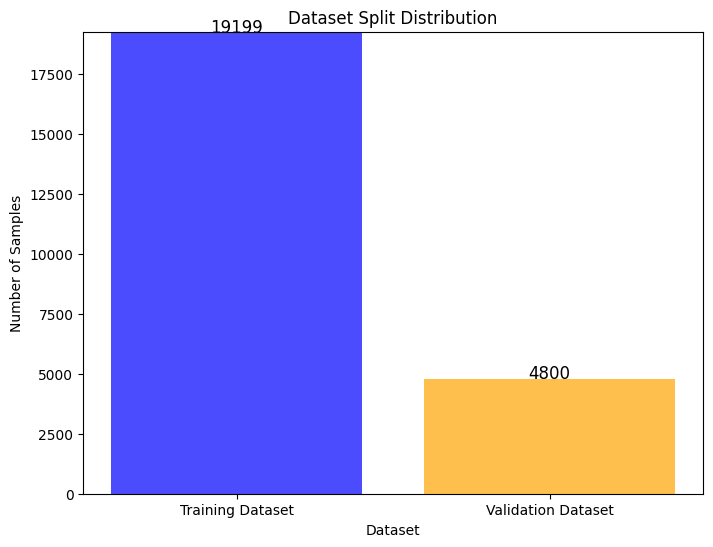

In [ ]:
import matplotlib.pyplot as plt

train_size = len(train_dataset)
val_size = len(val_dataset)

labels = ['Training Dataset', 'Validation Dataset']
sizes = [train_size, val_size]

plt.figure(figsize=(8, 6))
plt.bar(labels, sizes, color=['blue', 'orange'], alpha=0.7)

for i, size in enumerate(sizes):
    plt.text(i, size + 5, str(size), ha='center', fontsize=12)

plt.title('Dataset Split Distribution')
plt.ylabel('Number of Samples')
plt.xlabel('Dataset')
plt.ylim(0, max(sizes) + 50)
plt.show()


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
model = models.resnet18(pretrained=True)

num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) 

model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
best_val_acc = 0.0

train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)

    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc.item())
    
    print(f"Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

    model.eval()
    val_loss = 0.0
    val_corrects = 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            val_corrects += torch.sum(preds == labels.data)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    val_loss = val_loss / len(val_dataset)
    val_acc = val_corrects.double() / len(val_dataset)

    val_losses.append(val_loss)
    val_accuracies.append(val_acc.item())

    print(f"Val Loss: {val_loss:.4f} Acc: {val_acc:.4f}")

    print("\nClassification Report:")
    print(classification_report(all_labels, all_preds, target_names=dataset.classes))

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), f'best_model.pth{epoch}')

print(f'Best Validation Accuracy: {best_val_acc:.4f}')


/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 197MB/s]


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.4137 Acc: 0.8239
Val Loss: 0.3843 Acc: 0.8346

Classification Report:
              precision    recall  f1-score   support

        fake       0.79      0.92      0.85      2392
        real       0.90      0.75      0.82      2408

    accuracy                           0.83      4800
   macro avg       0.84      0.83      0.83      4800
weighted avg       0.84      0.83      0.83      4800

Epoch 2/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.2246 Acc: 0.9089
Val Loss: 0.2999 Acc: 0.8769

Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.86      0.87      2392
        real       0.86      0.90      0.88      2408

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Epoch 3/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1555 Acc: 0.9387
Val Loss: 0.4735 Acc: 0.8352

Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.71      0.81      2392
        real       0.77      0.96      0.85      2408

    accuracy                           0.84      4800
   macro avg       0.86      0.83      0.83      4800
weighted avg       0.86      0.84      0.83      4800

Epoch 4/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.1076 Acc: 0.9578
Val Loss: 0.3022 Acc: 0.8854

Classification Report:
              precision    recall  f1-score   support

        fake       0.94      0.82      0.88      2392
        real       0.84      0.95      0.89      2408

    accuracy                           0.89      4800
   macro avg       0.89      0.89      0.88      4800
weighted avg       0.89      0.89      0.88      4800

Epoch 5/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0749 Acc: 0.9722
Val Loss: 0.3999 Acc: 0.8681

Classification Report:
              precision    recall  f1-score   support

        fake       0.91      0.81      0.86      2392
        real       0.83      0.92      0.88      2408

    accuracy                           0.87      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.87      0.87      0.87      4800

Epoch 6/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0602 Acc: 0.9776
Val Loss: 0.6138 Acc: 0.8267

Classification Report:
              precision    recall  f1-score   support

        fake       0.86      0.78      0.82      2392
        real       0.80      0.87      0.83      2408

    accuracy                           0.83      4800
   macro avg       0.83      0.83      0.83      4800
weighted avg       0.83      0.83      0.83      4800

Epoch 7/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0650 Acc: 0.9750
Val Loss: 0.3833 Acc: 0.8796

Classification Report:
              precision    recall  f1-score   support

        fake       0.90      0.85      0.88      2392
        real       0.86      0.91      0.88      2408

    accuracy                           0.88      4800
   macro avg       0.88      0.88      0.88      4800
weighted avg       0.88      0.88      0.88      4800

Epoch 8/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0458 Acc: 0.9842
Val Loss: 0.5997 Acc: 0.8508

Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.74      0.83      2392
        real       0.79      0.96      0.87      2408

    accuracy                           0.85      4800
   macro avg       0.87      0.85      0.85      4800
weighted avg       0.87      0.85      0.85      4800

Epoch 9/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0398 Acc: 0.9862
Val Loss: 0.6595 Acc: 0.8442

Classification Report:
              precision    recall  f1-score   support

        fake       0.95      0.72      0.82      2392
        real       0.78      0.97      0.86      2408

    accuracy                           0.84      4800
   macro avg       0.87      0.84      0.84      4800
weighted avg       0.87      0.84      0.84      4800

Epoch 10/10


/opt/conda/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Train Loss: 0.0285 Acc: 0.9893
Val Loss: 0.5340 Acc: 0.8658

Classification Report:
              precision    recall  f1-score   support

        fake       0.82      0.94      0.87      2392
        real       0.93      0.79      0.86      2408

    accuracy                           0.87      4800
   macro avg       0.87      0.87      0.87      4800
weighted avg       0.87      0.87      0.87      4800

Best Validation Accuracy: 0.8854


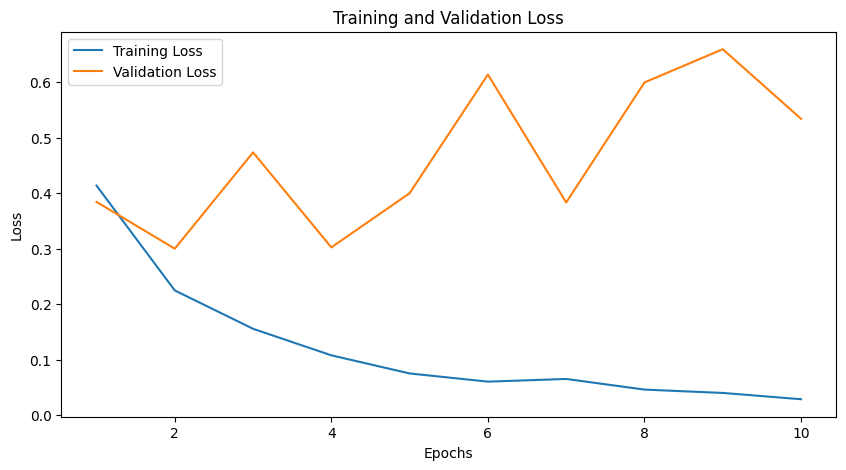

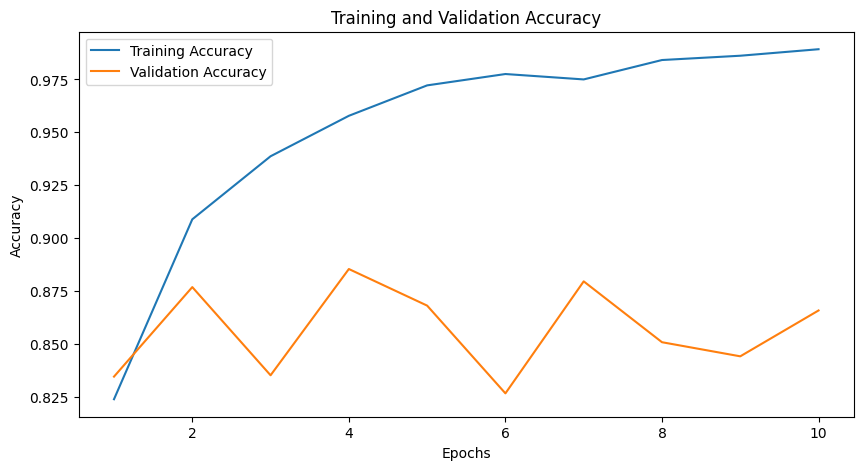

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, epochs + 1), val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
